In [61]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime
from os.path import isfile
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [62]:
filename="hourly cases.csv"
df_head=pd.read_csv(filename,nrows=0)
df_head_lst = list(df_head)[2:]
data_types = {val:pd.Int64Dtype() for val in df_head_lst}

In [63]:
df = pd.read_csv(filename,index_col=[0,1],dtype=data_types)
df

herlands Cases                    <NA>                <NA>  ...   
            Deaths                   <NA>                <NA>  ...   
            Recovered                <NA>                <NA>  ...   
Portugal    Cases                    <NA>                <NA>  ...   
            Deaths                   <NA>                <NA>  ...   
            Recovered                <NA>                <NA>  ...   
South-Korea Cases                    9583                9583  ...   
            Deaths                    152                 152  ...   
            Recovered                5033                5033  ...   
Spain       Cases                   73235               73235  ...   
            Deaths                   5982                5982  ...   
            Recovered               12285               12285  ...   
Sweden      Cases                    <NA>                <NA>  ...   
            Deaths                   <NA>                <NA>  ...   
            Recovered                <NA>                <NA>  ...   
Switzerland Cases                    <NA>                <NA>  ...   
            Deaths                   <NA>                <NA>  ...   
            Recovered                <NA>                <NA>  ...   
Turkey      Cases                    <NA>                <NA>  ...   
            Deaths                   <NA>                <NA>  ...   
            Recovered                <NA>                <NA>  ...   
UK          Cases                   17089               17089  ...   
            Deaths                   1019                1019  ...   
            Recovered                 135                 135  ...   
US          Cases                  123776              123776  ...   
            Deaths                   2229                2229  ...   
            Recovered                3231                3231  ...   
Worldwide   Cases                  664621              664941  ...   
            Deaths                  30891               30896  ...   
            Recovered              142368              142449  ...   

                       2020-03-31 12pm GMT  2020-03-31 1pm GMT  \
Belgium     Cases                    12775               12775   
            Deaths                     705                 705   
            Recovered                 1696                1696   
China       Cases                    81518               81518   
            Deaths                    3305                3305   
            Recovered                76052               76052   
France      Cases                    44550               44550   
            Deaths                    3024                3024   
            Recovered                 7927                7927   
Germany     Cases                    67051               67051   
            Deaths                     651                 682   
            Recovered                15824               15824   
India       Cases                     1251                1251   
            Deaths                      32                  32   
            Recovered                  102                 102   
Indonesia   Cases                     1528                1528   
            Deaths                     136                 136   
            Recovered                   81                  81   
Iran        Cases                    44605               44605   
            Deaths                    2898                2898   
            Recovered                14656               14656   
Italy       Cases                   101739              101739   
            Deaths                   11591               11591   
            Recovered                14620               14620   
Netherlands Cases                    11750               12595   
            Deaths                     864                1039   
            Recovered                  250                 250   
Portugal    Cases                     7443            

In [64]:
df.xs('Deaths',level=1)

,2020-03-28 6pm GMT,2020-03-28 7pm GMT,2020-03-28 8pm GMT,2020-03-28 9pm GMT,2020-03-28 10pm GMT,2020-03-28 11pm GMT,2020-03-29 12am GMT,2020-03-29 3am GMT,2020-03-29 7am GMT,2020-03-29 8am GMT,...,2020-03-31 12pm GMT,2020-03-31 1pm GMT,2020-03-31 2pm GMT,2020-03-31 3pm GMT,2020-03-31 4pm GMT,2020-03-31 5pm GMT,2020-03-31 6pm GMT,2020-03-31 7pm GMT,2020-03-31 8pm GMT,2020-03-31 9pm GMT
Belgium,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,705,705,705,705,705,705,705,705,705,705
China,3295,3295,3295,3295,3295,3295,3300,3300,3300,3300,...,3305,3305,3305,3305,3305,3305,3305,3305,3305,3305
France,1995,2314,2314,2314,2314,2314,2314,2314,2314,2314,...,3024,3024,3024,3024,3024,3024,3523,3523,3523,3523
Germany,403,403,430,430,433,433,433,433,433,433,...,651,682,682,682,682,682,682,682,682,774
India,<NA>,<NA>,20,20,24,24,24,24,25,25,...,32,32,32,32,32,32,32,35,35,35
Indonesia,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,136,136,136,136,136,136,136,136,136,136
Iran,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,2898,2898,2898,2898,2898,2898,2898,2898,2898,2898
Italy,10023,10023,10023,10023,10023,10023,10023,10023,10023,10023,...,11591,11591,11591,11591,11591,12428,12428,12428,12428,12428
Netherlands,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,864,1039,1039,1039,1039,1039,1039,1039,1039,1039
Portugal,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,160,160,160,160,160,160,160,160,160,160


In [65]:
def squeeze_nan(x, hold):
    if x.name not in hold:
        original_columns = x.index.tolist()

        squeezed = x.dropna()
        squeezed.index = [original_columns[n] for n in range(squeezed.count())]

        return squeezed.reindex(original_columns, fill_value=np.nan)
    else:
        return x

filter_cases='Deaths'


df1 = df.xs(filter_cases,level = 1).fillna(0)
df2 = df1[df1.columns[-37:]]
df2.loc["Worldwide"]
# df2 = df1[df1>start_num]
# df3 = df2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
# df3.columns=[f"Day {day+1}" for day in range(len(df3.columns.values.tolist()))]
# keep_cols = df3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
# keep_indices = df3[df3>filter_num].dropna(how='all').index.values.tolist()
# days = len(keep_cols)
# # keep_indices = Countries
# # keep_indices = ('Italy','Spain', 'France','US','UK')
# all_indices = df3.index.values.tolist() 
# drop_indices = [val for val in all_indices if val not in keep_indices]
# df4_1 = df3[df3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
# df4 = df4_1.sort_values(by=df4_1.columns.values.tolist()[::-1],ascending=True)
# df4

2020-03-30 9am GMT     34017
2020-03-30 10am GMT    34660
2020-03-30 11am GMT    34806
2020-03-30 12pm GMT    34847
2020-03-30 1pm GMT     35006
2020-03-30 2pm GMT     35035
2020-03-30 3pm GMT     35337
2020-03-30 4pm GMT     35347
2020-03-30 5pm GMT     36230
2020-03-30 6pm GMT     36865
2020-03-30 7pm GMT     36938
2020-03-30 8pm GMT     37019
2020-03-30 9pm GMT     37126
2020-03-30 10pm GMT    37561
2020-03-30 11pm GMT    37606
2020-03-31 12am GMT    37778
2020-03-31 1am GMT     37780
2020-03-31 2am GMT     37814
2020-03-31 3am GMT     37815
2020-03-31 4am GMT     37815
2020-03-31 5am GMT     37820
2020-03-31 6am GMT     37825
2020-03-31 7am GMT     37832
2020-03-31 8am GMT     37843
2020-03-31 9am GMT     37877
2020-03-31 10am GMT    38576
2020-03-31 11am GMT    38721
2020-03-31 12pm GMT    38771
2020-03-31 1pm GMT     39025
2020-03-31 2pm GMT     39070
2020-03-31 3pm GMT     39577
2020-03-31 4pm GMT     39794
2020-03-31 5pm GMT     40682
2020-03-31 6pm GMT     41245
2020-03-31 7pm

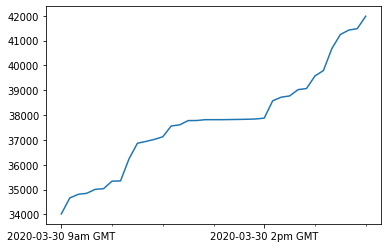

In [66]:
# for country in df2.loc["Worldwide":].T.columns.values.tolist():
#     line = df2.loc["Worldwide":].T[country].dropna().plot()
line = df2.loc["Worldwide"].plot()
# line.legend()
# line.set_ylim((0,max(df4.max())))
# line.set_xlim((0,days))
# line.set_ylabel(f'Number of {filter_cases}')
# line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(24))
# line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(6))


In [60]:
df.xs('Cases',level=1).loc['Worldwide']

2020-03-28 6pm GMT     645264
2020-03-28 7pm GMT     650926
2020-03-28 8pm GMT     656690
2020-03-28 9pm GMT     657915
2020-03-28 10pm GMT    659435
                        ...  
2020-03-31 4pm GMT     819038
2020-03-31 5pm GMT     825412
2020-03-31 6pm GMT     837021
2020-03-31 7pm GMT     842735
2020-03-31 8pm GMT     846251
Name: Worldwide, Length: 67, dtype: Int64